<a href="https://colab.research.google.com/github/sujitmandava/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from tensorflow import keras
from xgboost import XGBClassifier

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Data Overview and Preprocessing


In [2]:
# Loading the dataset
dataset = pd.read_csv("/content/drive/Shareddrives/ML Project/creditcard.csv")

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Number of Genuine and Fraud point
print("Genuine: ",len([x for x in dataset["Class"] if x==0]))
print("Fraud: ",len([x for x in dataset["Class"] if x!=0]))

print("% Genuine Transactions: ", 100*len([x for x in dataset["Class"] if x==0])/len(dataset))
print("% Fraudulent Transactions: ", 100*len([x for x in dataset["Class"] if x==1])/len(dataset))

Genuine:  284315
Fraud:  492
% Genuine Transactions:  99.827251436938
% Fraudulent Transactions:  0.1727485630620034


Text(0, 0.5, 'Frequency')

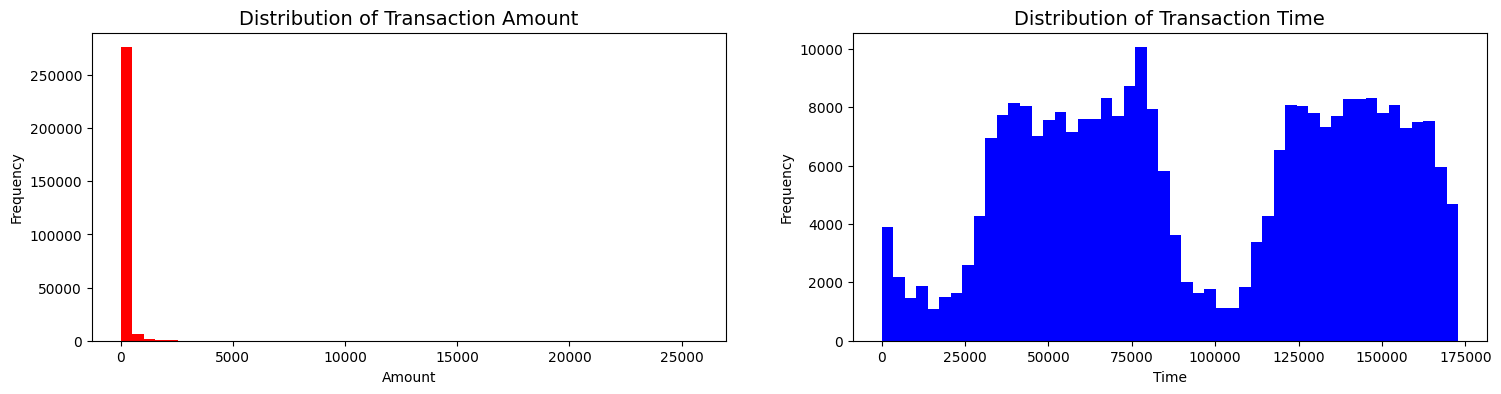

In [4]:
amountValues = dataset['Amount'].values
timeValues = dataset['Time'].values

plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.hist(amountValues, color='r', bins=50)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(timeValues, color='b', bins=50)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Frequency')

In [5]:
robustScaler = RobustScaler()

dataset['scaled_amount'] = robustScaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = robustScaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [6]:
# Train Test split
features = list(dataset.columns)
features.remove("Class")
labels = ["Class"]
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[labels],
                                                    train_size=0.75,
                                                    #stratify=dataset[labels]
                                                    random_state=42)
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train,
                                                    train_size=0.8,
                                                    # stratify=y_train,
                                                    random_state=42)

In [7]:
fraudPoints = dataset[dataset["Class"] == 1]
restOfPoints = dataset[dataset["Class"] == 0]
# print(restOfPoints)

print(len(restOfPoints))
print(len(fraudPoints))

284315
492


In [8]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

# Basic Classification Models

## K-NN

In [9]:
#Create an instance of k nearest neighbor classifier
knn = KNeighborsClassifier()

# #fit the model
knn.fit(X_train, y_train)

# #Predict the labels for train data
knn_pred_train = knn.predict(X_train)

# #Predict the labels for test data
knn_pred_test = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [10]:
print("<Training Data>")
print("Accuracy:")
print(accuracy_score(y_train, knn_pred_train))
print("Precision:")
print(precision_score(y_train, knn_pred_train, average='macro'))
print("Recall:")
print(recall_score(y_train, knn_pred_train, average='macro'),"\n\n")
print("<Test Data>")
print("Accuracy:")
print(accuracy_score(y_test, knn_pred_test))
print("Precision:")
print(precision_score(y_test, knn_pred_test, average='macro'))
print("Recall:")
print(recall_score(y_test, knn_pred_test, average='macro'))

<Training Data>
Accuracy:
0.9995318461646497
Precision:
0.9703977635689127
Recall:
0.8933986550532473 


<Test Data>
Accuracy:
0.9993679952810315
Precision:
0.9268653489157033
Recall:
0.8627333902896495


In [11]:
# # Defining cross validation parameters for grid search
# n_neighbors = [3,5,7,9,11]
# weights = ['uniform', 'distance'] # Possible to create own weight metric, look into it
# algorithm = ['ball_tree', 'kd_tree', 'brute']
# # leaf_size = []
# p = [1,2,3,4]

# param_grid = {'n_neighbors':n_neighbors, 'weights':weights, 'algorithm':algorithm, 'p':p}

# # Running grid search CV
# gridSearch_KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv = 5, scoring='recall', verbose = 2.2)
# gridSearch_KNN.fit(X_train, y_train)

## SVM

In [12]:
#Create an instance of support vector machine
svm = SVC()

#fit the model
svm.fit(X_train, y_train)

#Predict the labels for train data
svm_pred_train = svm.predict(X_train)

#Predict the labels for test data
svm_pred_test = svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print("<Training Data>")
print("Accuracy:")
print(accuracy_score(y_train, svm_pred_train))
print("Precision:")
print(precision_score(y_train, svm_pred_train, average='macro'))
print("Recall:")
print(recall_score(y_train, svm_pred_train, average='macro'),"\n\n")
print("<Test Data>")
print("Accuracy:")
print(accuracy_score(y_test, svm_pred_test))
print("Precision:")
print(precision_score(y_test, svm_pred_test, average='macro'))
print("Recall:")
print(recall_score(y_test, svm_pred_test, average='macro'))

<Training Data>
Accuracy:
0.9996196250087779
Precision:
0.9879223514151312
Recall:
0.9032611013655611 


<Test Data>
Accuracy:
0.9993539507317211
Precision:
0.951540071053488
Recall:
0.8318021395839716


## Decision Tree Classifiers

In [14]:
#Create an instance of decision tree classifier
dtc = DecisionTreeClassifier()

#fit the model
dtc.fit(X_train, y_train)

#Predict the labels for train data
dtc_pred_train = dtc.predict(X_train)

#Predict the labels for test data
dtc_pred_test = dtc.predict(X_test)

In [15]:
print("<Training Data>")
print("Accuracy:")
print(accuracy_score(y_train, dtc_pred_train))
print("Precision:")
print(precision_score(y_train, dtc_pred_train, average='macro'))
print("Recall:")
print(recall_score(y_train, dtc_pred_train, average='macro'),"\n\n")
print("<Test Data>")
print("Accuracy:")
print(accuracy_score(y_test, dtc_pred_test))
print("Precision:")
print(precision_score(y_test, dtc_pred_test, average='macro'))
print("Recall:")
print(recall_score(y_test, dtc_pred_test, average='macro'))

<Training Data>
Accuracy:
1.0
Precision:
1.0
Recall:
1.0 


<Test Data>
Accuracy:
0.9991854161399961
Precision:
0.873662876701236
Recall:
0.8670597009332811


## Random Forest Classifier

In [16]:
#Create an instance of random forest classifier
rfc = RandomForestClassifier()

# #fit the model
rfc.fit(X_train, y_train)

# # #Predict the labels for train data
rfc_pred_train = rfc.predict(X_train)

# # #Predict the labels for test data
rfc_pred_test = rfc.predict(X_test)

<ipython-input-16-6bd1c4b81efc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [17]:
print("<Training Data>")
print("Accuracy:")
print(accuracy_score(y_train, rfc_pred_train))
print()
print("Precision:")
print(precision_score(y_train, rfc_pred_train, average='macro'))
print("Recall:")
print(recall_score(y_train, rfc_pred_train, average='macro'))
print()
print()
print("<Test Data>")
print("Accuracy:")
print(accuracy_score(y_test, rfc_pred_test))
print("Precision:")
print(precision_score(y_test, rfc_pred_test, average='macro'))
print("Recall:")
print(recall_score(y_test, rfc_pred_test, average='macro'))

<Training Data>
Accuracy:
0.9999941480770581

Precision:
0.9999970688240122
Recall:
0.9983606557377049


<Test Data>
Accuracy:
0.9994663071262043
Precision:
0.9431091090060655
Recall:
0.880453605644775


In [18]:
# n_estimators = [100,150,200]
# criterion = ['gini', 'entropy', 'log_loss']
# max_features = ['sqrt', 'log2']
# bootstrap = [True,False]
# # oob_score = [True,False]

# param_grid = {'criterion': criterion, 'max_features':max_features, 'bootstrap':bootstrap}

# gridSearch_RFC= GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,scoring='recall',cv=5,verbose=3)
# gridSearch_RFC.fit(X_train, y_train)

## Logistic Regression

In [19]:
## create an instance of the logistic regressor
lr = LogisticRegression()

## Learn the classiifer using the training data
lr.fit(X_train, y_train)

#Predict the labels for train data
lr_pred_train = lr.predict(X_train)

#Predict the labels for test data
lr_pred_test = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print("<Training Data>")
print("Accuracy:")
print(accuracy_score(y_train, lr_pred_train))
print("Precision:")
print(precision_score(y_train, lr_pred_train, average='macro'))
print("Recall:")
print(recall_score(y_train, lr_pred_train, average='macro'))
print()
print()
print("<Test Data>")
print("Accuracy:")
print(accuracy_score(y_test, lr_pred_test))
print("Precision:")
print(precision_score(y_test, lr_pred_test, average='macro'))
print("Recall:")
print(recall_score(y_test, lr_pred_test, average='macro'))

<Training Data>
Accuracy:
0.9992860654010908
Precision:
0.9530374216029236
Recall:
0.8343646744515953


<Test Data>
Accuracy:
0.9992275497879273
Precision:
0.9265269623309281
Recall:
0.8096501120308246


In [21]:
# # Logistic regression CV

# penalty = ["l2", 'none']
# tol = [1e-5, 1e-4, 1e-3]
# C = [0.5, 1, 2]
# max_iter = [50,100,200]

# param_grid = {"penalty" : penalty, "tol" : tol, "C" : C, "max_iter" : max_iter}

# gridSearch_LR= GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,scoring='recall',cv=5,verbose=3)
# gridSearch_LR.fit(X_train, y_train)

# print()
# print(gridSearch_LR.cv_results_)

# Neural Networks

## ANN

In [22]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [23]:
metrics = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=metrics)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
# class_weight = {0:w_real, 1:w_fraud}

r = model.fit(
    X_train, y_train,
    validation_data=(X_vald, y_vald),
    batch_size=2048,
    epochs=300,
    # class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
84/84 [==============================] - 8s 15ms/step - loss: 0.7996 - fn: 91.0000 - fp: 78647.0000 - tn: 91932.0000 - tp: 214.0000 - precision: 0.0027 - recall: 0.7016 - val_loss: 0.6011 - val_fn: 16.0000 - val_fp: 1659.0000 - val_tn: 40988.0000 - val_tp: 58.0000 - val_precision: 0.0338 - val_recall: 0.7838
Epoch 2/300
17/84 [=====>........................] - ETA: 0s - loss: 0.7164 - fn: 12.0000 - fp: 14181.0000 - tn: 20580.0000 - tp: 43.0000 - precision: 0.0030 - recall: 0.7818

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 1s 10ms/step - loss: 0.6770 - fn: 52.0000 - fp: 63722.0000 - tn: 106857.0000 - tp: 253.0000 - precision: 0.0040 - recall: 0.8295 - val_loss: 0.5328 - val_fn: 16.0000 - val_fp: 390.0000 - val_tn: 42257.0000 - val_tp: 58.0000 - val_precision: 0.1295 - val_recall: 0.7838
Epoch 3/300
84/84 [==============================] - 1s 10ms/step - loss: 0.5980 - fn: 40.0000 - fp: 48445.0000 - tn: 122134.0000 - tp: 265.0000 - precision: 0.0054 - recall: 0.8689 - val_loss: 0.4837 - val_fn: 16.0000 - val_fp: 123.0000 - val_tn: 42524.0000 - val_tp: 58.0000 - val_precision: 0.3204 - val_recall: 0.7838
Epoch 4/300
84/84 [==============================] - 1s 8ms/step - loss: 0.5228 - fn: 46.0000 - fp: 32996.0000 - tn: 137583.0000 - tp: 259.0000 - precision: 0.0078 - recall: 0.8492 - val_loss: 0.4122 - val_fn: 15.0000 - val_fp: 38.0000 - val_tn: 42609.0000 - val_tp: 59.0000 - val_precision: 0.6082 - val_recall: 0.7973
Epoch 5/300
84/84 [=============================

In [24]:
score = model.evaluate(X_test, y_test)
print(score)
print('Precision: ', score[-2])
print('Recall: ', score[-1])

2226/2226 [==============================] - 8s 4ms/step - loss: 0.0043 - fn: 26.0000 - fp: 13.0000 - tn: 71076.0000 - tp: 87.0000 - precision: 0.8700 - recall: 0.7699
[0.004324023611843586, 26.0, 13.0, 71076.0, 87.0, 0.8700000047683716, 0.769911527633667]
Precision:  0.8700000047683716
Recall:  0.769911527633667


## XGBoost Classifier

In [25]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    170579.0  305.0       1.0   170884.0      170884.0
_______________________________________________
Confusion Matrix: 
 [[170579      0]
 [     0    305]]

Test Result:
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999677    0.909091  0.999551      0.954384      0.999533
recall         0.999873    0.796460  0.999551      0.898167      0.999551
f1-score       0.999775    0.849057  0.999551      0.924416      0.999536
support    71089.000000  113.000000  0.999551  71202.000000  71202.000000
_______________________________________________